### Load libraries

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data from admissions.csv 

In [46]:
!!cd

['E:\\classroom\\ds\\aug16\\admission']

In [47]:
df = pd.read_csv("admission.csv")

#### Understand data 

In [48]:
df.drop(columns=['Sno'], inplace=True)

In [49]:
df.head()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [50]:
df.shape

(500, 8)

In [51]:
df.columns

Index(['Gre', 'Toefl', 'Rating', 'Sop', 'Lor', 'Cgpa', 'Research', 'Chance'], dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Gre         500 non-null int64
Toefl       500 non-null int64
Rating      500 non-null int64
Sop         500 non-null float64
Lor         500 non-null float64
Cgpa        500 non-null float64
Research    500 non-null int64
Chance      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [53]:
df.describe()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Data Visualization 

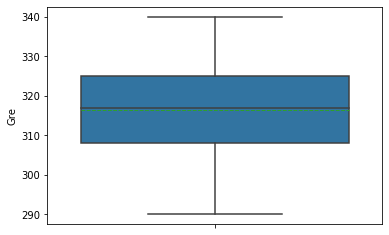

In [54]:
sns.boxplot(y="Gre",orient="v", data=df, showmeans=True, meanline=True)

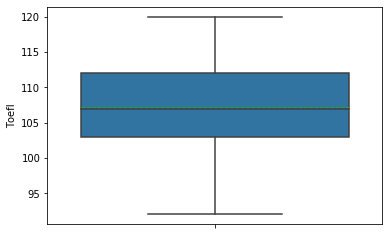

In [55]:
sns.boxplot(y="Toefl",orient="v", data=df, showmeans=True, meanline=True)

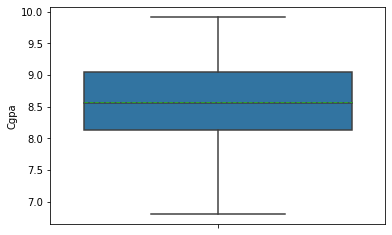

In [56]:
sns.boxplot(y="Cgpa",orient="v", data=df, showmeans=True, meanline=True)

#### Bi-variate Ananlysis

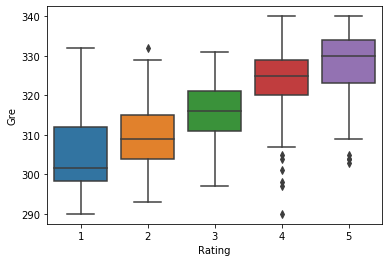

In [57]:
sns.boxplot(y="Gre", x = "Rating", data=df)

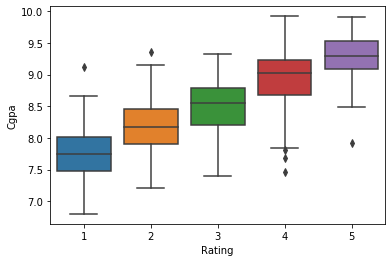

In [58]:
sns.boxplot(y="Cgpa", x ="Rating", data=df)

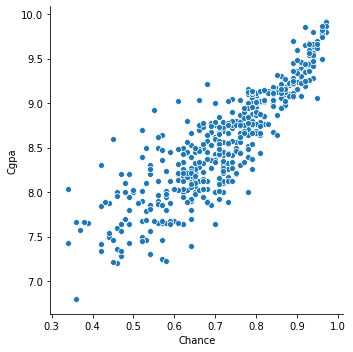

In [59]:
sns.relplot(data=df, x='Chance',y='Cgpa') 

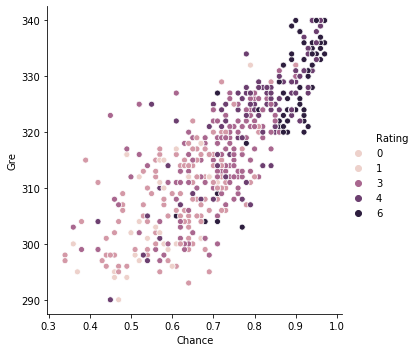

In [60]:
sns.relplot(data=df, x='Chance',y='Gre', hue="Rating") 

In [61]:
corrmat = df.corr()

In [62]:
corrmat

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
Gre,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
Toefl,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
Sop,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
Lor,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
Cgpa,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [63]:
corrmat['Chance']

Gre         0.810351
Toefl       0.792228
Rating      0.690132
Sop         0.684137
Lor         0.645365
Cgpa        0.882413
Research    0.545871
Chance      1.000000
Name: Chance, dtype: float64

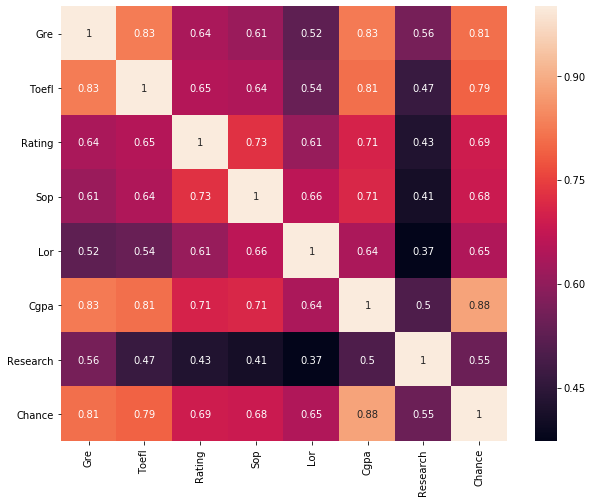

In [64]:
sns.heatmap(corrmat, annot=True)
plt.gcf().set_size_inches(10,8)

In [65]:
df.corr()['Chance'].sort_values(ascending=False)

Chance      1.000000
Cgpa        0.882413
Gre         0.810351
Toefl       0.792228
Rating      0.690132
Sop         0.684137
Lor         0.645365
Research    0.545871
Name: Chance, dtype: float64

### Build Machine Learning Model 

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [67]:
X = df[['Gre','Toefl','Cgpa']]
y = df['Chance']

In [68]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [69]:
## Fit model or Training Model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
model.coef_

array([0.00253005, 0.00317892, 0.14254275])

In [71]:
model.intercept_

-1.6424396080709749

### Evaluate Model 

In [72]:
model.score(X_train,y_train)

0.8122343451664387

In [73]:
## Evaluate Model using test data 
y_pred = model.predict(X_test)

In [74]:
y_pred

array([0.62802152, 0.83209435, 0.79119818, 0.85046086, 0.60222891,
       0.66888863, 0.55297329, 0.68293116, 0.55296602, 0.7583334 ,
       0.64873954, 0.71937657, 0.6507993 , 0.77885419, 0.86739467,
       0.53882491, 0.79022851, 0.65400002, 0.79288626, 0.56219652,
       0.50909131, 0.68659174, 0.52225549, 0.90081384, 0.81905787,
       0.72911371, 0.73958379, 0.51931011, 0.58999078, 0.59490866,
       0.73030971, 0.45888054, 0.66340913, 0.80448279, 0.5787659 ,
       0.52874102, 0.83928376, 0.85503615, 0.60540057, 0.66556749,
       0.67097019, 0.87799247, 0.87690238, 0.72690446, 0.78389973,
       0.78179638, 0.97242781, 0.85395332, 0.63682535, 0.66494042,
       0.65084293, 0.61405173, 0.61552805, 0.81304988, 0.69329948,
       0.84059603, 0.54538313, 0.84965524, 0.63614016, 0.64833467,
       0.48322597, 0.89619497, 0.62266971, 0.93309933, 0.75664533,
       0.6429465 , 0.71415241, 0.85044633, 0.53960873, 0.77251084,
       0.90618749, 0.80734817, 0.69299321, 0.62121519, 0.78439

In [75]:
## get MSE, R2 and MAE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

Mean Squared Error : 0.00
R2 Score: 0.76
Mean Absolute Error : 0.05


### Model with all features 

In [76]:
X2 = df[['Gre','Toefl','Cgpa','Rating','Sop','Lor','Research']]
y2 = df['Chance']

In [77]:
# Split data into train and test 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2, random_state=0)

In [78]:
## Fit model or Training Model
model2 = LinearRegression()
model2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
model2.score(X2_train,y2_train)

0.8320945273130533

In [80]:
y2_pred = model2.predict(X2_test)

In [81]:
score2 = r2_score(y2_test,y2_pred)
print(f"R2 Score: {score2:0.2f}")

R2 Score: 0.77


### DecisionTreeRegressor

In [82]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [83]:
model.score(X_train,y_train)

0.9980730614107963

In [84]:
y_pred = model.predict(X_test)

In [85]:
score = r2_score(y_test,y_pred)
print(f"R2 Score: {score2:0.2f}")

R2 Score: 0.77


## Pickle model 

In [86]:
!!cd

['E:\\classroom\\ds\\aug16\\admission']

In [87]:
pd.to_pickle(model,'DTR_model.pickle')

## Test Model on user input

In [23]:
# Unpickle model and use it for predicting probability 
model = pd.read_pickle('DTR_model.pickle')

In [88]:
data = [[295,120,7],[325,120,9]]
result = model.predict(data)
print(result)
for r in result:
    print(f"Probability of getting admission is : {r*100}% ")  

[0.47 0.76]
Probability of getting admission is : 47.0% 
Probability of getting admission is : 76.0% 


### Scale value - Gre, Toefl, Cgpa, Rating

In [ ]:
from sklearn.preprocessing import scale

In [94]:
X = df[['Gre','Toefl','Cgpa','Rating']]
y = df['Chance']

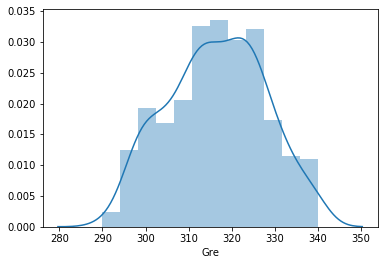

In [95]:
sns.distplot(X['Gre'])

In [98]:
X['Gre'] = scale(X['Gre'])
X['Toefl'] = scale(X['Toefl'])
X['Cgpa'] = scale(X['Cgpa'])
X['Rating'] = scale(X['Rating'])  

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

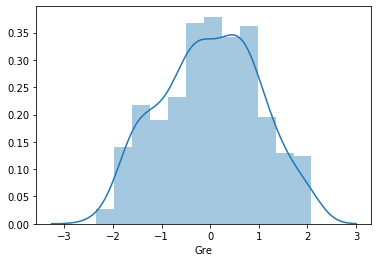

In [100]:
sns.distplot(X['Gre'])

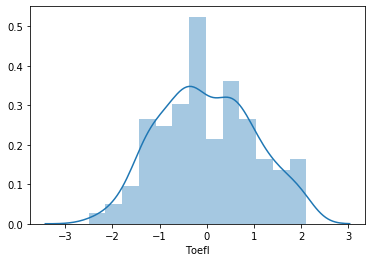

In [101]:
sns.distplot(X['Toefl'])

In [102]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.2, random_state=0)

In [103]:
## Fit model or Training Model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
model.score(X_train,y_train)

0.8320945273130533

In [105]:
y_pred = model.predict(X_test)

In [106]:
score = r2_score(y_test,y_pred)
print(f"R2 Score: {score2:0.2f}")

R2 Score: 0.77


In [107]:
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

Mean Absolute Error : 0.05


In [108]:
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mae:0.2f}")

Mean Squared Error : 0.05
